In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from esda.moran import Moran
from esda.geary import Geary
from esda.getisord import G, G_Local
from pysal.lib import weights
from splot.esda import moran_scatterplot
from libpysal.weights import DistanceBand
from libpysal.weights import KNN

Julia Pawluś, Kamil Sarzyniak, Piotr Stawarski
- Projekt 2 z przedmiotu Ekonometrii Przestrzennej

In [ ]:
woj = pd.read_csv("przestepstwa.csv")
pow = pd.read_csv("przestepstwa_pow.csv")
pow_map = "powiaty.shp"
pow_m = gpd.read_file(pow_map)

In [17]:
woj

,oid,kod KTS,województwo,powierzchnia,rok,TERYT,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,1,11200000000,małopolskie,15183.0,2020,12,69174.0
1,2,12400000000,śląskie,12333.0,2020,24,117632.0
2,3,20800000000,lubuskie,13988.0,2020,8,24531.0
3,4,23000000000,wielkopolskie,29826.0,2020,30,58900.0
4,5,23200000000,zachodniopomorskie,22905.0,2020,32,35325.0
5,6,30200000000,dolnośląskie,19947.0,2020,2,74802.0
6,7,31600000000,opolskie,9412.0,2020,16,15710.0
7,8,40400000000,kujawsko-pomorskie,17971.0,2020,4,37172.0
8,9,42200000000,pomorskie,18323.0,2020,22,49381.0
9,10,42800000000,warmińsko-mazurskie,24173.0,2020,28,26295.0


In [18]:
woj.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT'], axis=1, inplace=True)
woj.rename(columns={'województwo': 'JPT_NAZWA_'}, inplace=True)
woj

,JPT_NAZWA_,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
0,małopolskie,69174.0
1,śląskie,117632.0
2,lubuskie,24531.0
3,wielkopolskie,58900.0
4,zachodniopomorskie,35325.0
5,dolnośląskie,74802.0
6,opolskie,15710.0
7,kujawsko-pomorskie,37172.0
8,pomorskie,49381.0
9,warmińsko-mazurskie,26295.0


In [19]:
woj.describe()

,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem
count,16.000000
mean,47838.000000
std,31133.054732
min,15710.000000
25%,25854.000000
50%,36248.500000
75%,61468.500000
max,117632.000000


In [20]:
woj.dtypes

JPT_NAZWA_                                                                                                                                                 object
Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych wg powiatów (dane kwartalne)|rok|przestępstwa stwierdzone|ogółem    float64
dtype: object

In [21]:
pow

,oid,kod KTS,powiat,powierzchnia,rok,TERYT,Typ powiatu,TERYT województwa,Województwo,Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem
0,7,11212210000,nowosądecki,1549.0,2020,1210,powiat,12,małopolskie,11958.0
1,2,11212416000,tarnowski,1412.0,2020,1216,powiat,12,małopolskie,2860.0
2,5,20811301000,gorzowski,1214.0,2020,801,powiat,8,lubuskie,1108.0
3,40,23015810000,koniński,1578.0,2020,3010,powiat,30,wielkopolskie,1163.0
4,13,23016121000,poznański,1900.0,2020,3021,powiat,30,wielkopolskie,5260.0
...,...,...,...,...,...,...,...,...,...,...
375,39,71427126000,siedlecki,1603.0,2020,1426,powiat,14,mazowieckie,766.0
376,377,71427129000,sokołowski,1131.0,2020,1429,powiat,14,mazowieckie,919.0
377,378,71427133000,węgrowski,1221.0,2020,1433,powiat,14,mazowieckie,807.0
378,379,71427328000,sochaczewski,735.0,2020,1428,powiat,14,mazowieckie,1419.0


In [22]:
pow.drop(['oid', 'kod KTS', 'Województwo', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow

,JPT_NAZWA_,Przestępstwa_powiaty
0,nowosądecki,11958.0
1,tarnowski,2860.0
2,gorzowski,1108.0
3,koniński,1163.0
4,poznański,5260.0
...,...,...
375,siedlecki,766.0
376,sokołowski,919.0
377,węgrowski,807.0
378,sochaczewski,1419.0


In [23]:
pow.describe()

,Przestępstwa_powiaty
count,380.000000
mean,2014.231579
std,3182.327268
min,239.000000
25%,839.500000
50%,1271.500000
75%,2014.500000
max,45754.000000


<Axes: >

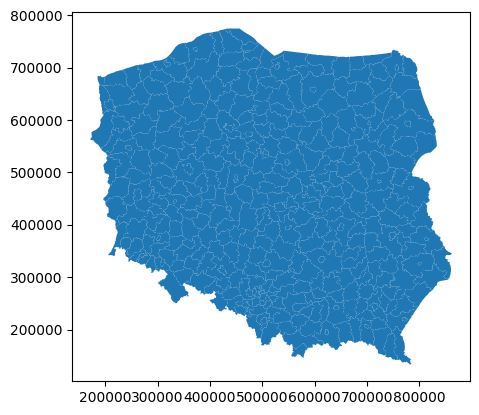

In [24]:
pow_m.plot(legend=True)

In [25]:
pow_m.head()

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.53 579834.38, 342632.859 5798..."


In [26]:
pow_m['JPT_NAZWA_'] = pow_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [27]:
file_path = 'ludnosc.csv'


df = pd.read_csv(file_path)
df.columns = df.columns.str.strip() 


ludnosc_pow = pd.DataFrame({
    'JPT_NAZWA_': df['Powiaty'],
    'Ludnosc_powiaty': df['Ludnosc']
})


print(ludnosc_pow)

            JPT_NAZWA_  Ludnosc_powiaty
0        bolesławiecki            90103
1       dzierżoniowski           100813
2            głogowski            89102
3             górowski            34870
4             jaworski            50116
..                 ...              ...
375         świdwiński            46724
376            wałecki            53039
377           Koszalin           107048
378           Szczecin           401907
379        Świnoujście            40888

[380 rows x 2 columns]


In [28]:
print(pow)

       JPT_NAZWA_  Przestępstwa_powiaty
0     nowosądecki               11958.0
1       tarnowski                2860.0
2       gorzowski                1108.0
3        koniński                1163.0
4       poznański                5260.0
..            ...                   ...
375     siedlecki                 766.0
376    sokołowski                 919.0
377     węgrowski                 807.0
378  sochaczewski                1419.0
379   żyrardowski                1603.0

[380 rows x 2 columns]


In [29]:
pow['JPT_NAZWA_'] = pow['JPT_NAZWA_'].str.strip()
ludnosc_pow['JPT_NAZWA_'] = ludnosc_pow['JPT_NAZWA_'].str.strip()

In [30]:
merged_df = pow.merge(ludnosc_pow, on='JPT_NAZWA_')

In [31]:
merged_df['Przestępstwa_średnia_powiaty'] = (merged_df['Przestępstwa_powiaty'] / merged_df['Ludnosc_powiaty'])

In [32]:
print(merged_df[['JPT_NAZWA_', 'Przestępstwa_powiaty', 'Ludnosc_powiaty', 'Przestępstwa_średnia_powiaty']])

       JPT_NAZWA_  Przestępstwa_powiaty  Ludnosc_powiaty  \
0     nowosądecki               11958.0           216796   
1       tarnowski                2860.0           201497   
2       gorzowski                1108.0            71836   
3        koniński                1163.0           130053   
4       poznański                5260.0           399272   
..            ...                   ...              ...   
395     siedlecki                 766.0            81362   
396    sokołowski                 919.0            53804   
397     węgrowski                 807.0            65822   
398  sochaczewski                1419.0            85045   
399   żyrardowski                1603.0            75749   

     Przestępstwa_średnia_powiaty  
0                        0.055158  
1                        0.014194  
2                        0.015424  
3                        0.008943  
4                        0.013174  
..                            ...  
395                      0.

In [33]:
pow = merged_df[['JPT_NAZWA_', 'Przestępstwa_średnia_powiaty']]
print(pow)

       JPT_NAZWA_  Przestępstwa_średnia_powiaty
0     nowosądecki                      0.055158
1       tarnowski                      0.014194
2       gorzowski                      0.015424
3        koniński                      0.008943
4       poznański                      0.013174
..            ...                           ...
395     siedlecki                      0.009415
396    sokołowski                      0.017081
397     węgrowski                      0.012260
398  sochaczewski                      0.016685
399   żyrardowski                      0.021162

[400 rows x 2 columns]


In [34]:
print(pow.sort_values(by='Przestępstwa_średnia_powiaty', ascending=False))

          JPT_NAZWA_  Przestępstwa_średnia_powiaty
44            Krosno                      0.182498
15   Piekary Śląskie                      0.150790
39       Ruda Śląska                      0.091868
243          gdański                      0.055558
0        nowosądecki                      0.055158
..               ...                           ...
340        przemyski                      0.007183
346      strzyżowski                      0.006646
30           opolski                      0.006401
201        świdnicki                      0.004964
84           bielski                      0.003832

[400 rows x 2 columns]


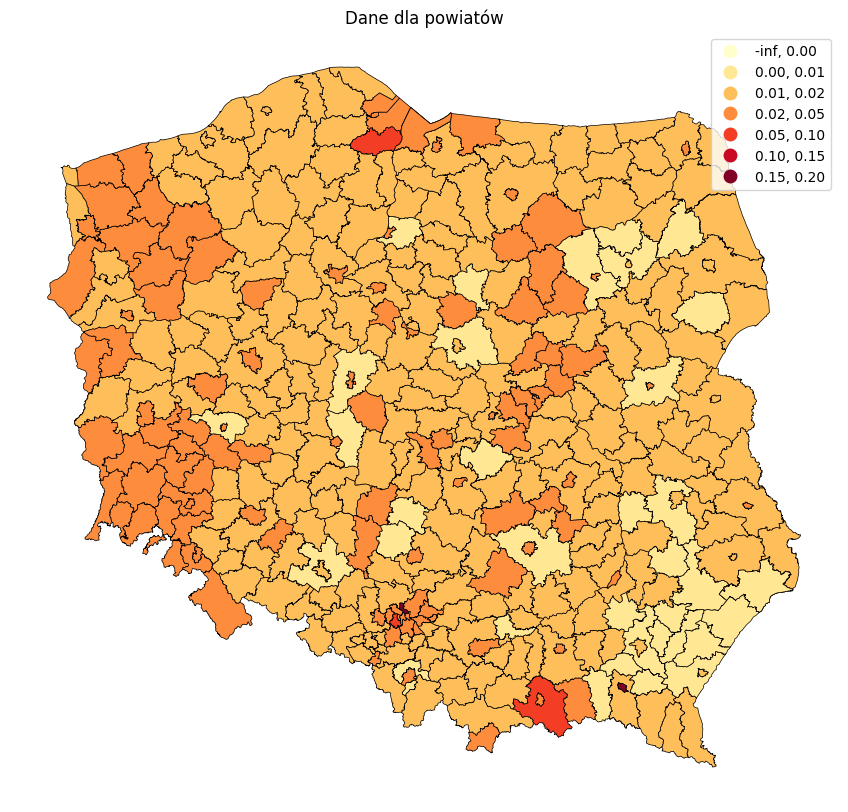

In [35]:
merged_pow = pow_m.merge(pow, on='JPT_NAZWA_')


bins = [0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]  # Przedziały wartości

# Dodanie kolumny z kategoryzacją danych
merged_pow['Kategoria'] = np.digitize(
    merged_pow['Przestępstwa_średnia_powiaty'], bins
)

# Tworzenie mapy z nową skalą
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow.plot(
    column='Przestępstwa_średnia_powiaty',
    cmap='YlOrRd',  # Paleta kolorów
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    scheme='UserDefined',  # Użycie własnych przedziałów
    classification_kwds={'bins': bins},  # Określenie przedziałów
    ax=ax
)
ax.set_axis_off()
plt.title('Dane dla powiatów')
plt.show()

In [36]:
#Analiza przy użyciu binarnej macierzy sąsiedztwa 

In [37]:
data_column = 'Przestępstwa_średnia_powiaty'

w = weights.Queen.from_dataframe(merged_pow)
w.transform = 'r'

C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\401519068.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_pow)


('WARNING: ', 274, ' is an island (no neighbors)')


c:\Users\KamilSarzyniak\anaconda3\envs\py10\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 274.
  W.__init__(self, neighbors, ids=ids, **kw)


In [38]:
y = merged_pow[data_column]
moran_pow = Moran(y, w)
print("Moran's I:", moran_pow.I)           # Wartość statystyki Moran's I
print("E(I):", moran_pow.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_pow.VI_norm)         # Wariancja Var(I)
print("Z(I):", moran_pow.z_norm)            # Statystyka Z(I)
print("p-value:", moran_pow.p_norm)         # Wartość p

Moran's I: 0.09657896342641314
E(I): -0.00228310502283105
Var(I): 0.0008340830568668548
Z(I): 3.4231430095671778
p-value: 0.0006190150114729648


In [39]:
geary_pow = Geary(y, w)
print("Geary's C:", geary_pow.C)           
print("E(C):", geary_pow.EC)              
print("Var(C):", geary_pow.VC_norm)            
print("Z(C):", geary_pow.z_norm)               
print("p-value:", geary_pow.p_norm)         

Geary's C: 0.8083744371413427
E(C): 1.0
Var(C): 0.0011348124581800488
Z(C): -5.688416612280592
p-value: 6.411134867236472e-09


In [40]:
g_pow = G(y, w)
print("G:", g_pow.G)                      
print("E(G):", g_pow.EG)                   
print("Var(G):", g_pow.VG)                
print("Z(G):", g_pow.z_norm)                
print("p-value:", g_pow.p_norm)              

G: 0.0146668844621921
E(G): 0.015342049697839632
Var(G): 2.4216084391163735e-07
Z(G): -1.3720126373469748
p-value: 0.08502975189135165


In [41]:
g_local_pow = G_Local(y, w)
print("Local G* values:", g_local_pow.Zs)

c:\Users\KamilSarzyniak\anaconda3\envs\py10\lib\site-packages\esda\getisord.py:527: RuntimeWarning: invalid value encountered in divide
  z_scores = (statistic - expected_value) / np.sqrt(expected_variance)


Local G* values: [ 1.06521565e+00  1.19051065e+00  1.12158673e+00  1.21858534e+00
  1.06264510e-01  2.31703636e-01  1.62984813e-01  2.59500713e-01
  1.71063419e-01  6.48100462e-02 -2.82822446e-01 -1.75424779e-01
 -1.09378469e-01 -2.65889905e-01 -5.69253367e-02 -1.35745100e-02
 -9.28120828e-03  2.14579445e-01 -3.60020387e-01  1.19786036e-01
  7.60267848e-01 -3.12814151e-01  9.29563571e-03 -1.34565892e-01
 -2.51894079e-01 -5.51894694e-01 -3.85926147e-01  4.85992725e-02
 -8.90457260e-01 -3.05195689e-01 -3.69085337e-01  1.74821434e-01
 -2.26947690e-02 -1.23606095e-01 -1.79967691e-01 -5.38816872e-01
 -1.81342091e-01 -1.30879756e-01 -4.88833063e-02 -3.43431139e-01
 -6.71390487e-02 -2.80501036e-02  3.55119683e-02 -2.60469237e-01
  6.18359334e-02  3.20917754e+00 -2.19620944e-01  2.68027364e+00
  5.61504096e-01  1.60897742e-01 -2.30399167e-02  4.98607541e-01
 -2.81565505e-01 -2.29322744e-01 -3.10859651e-01 -1.30756034e-01
 -2.32288989e-01 -5.96360375e-01 -1.30634245e-01 -1.47405769e-01
  2.3378

c:\Users\KamilSarzyniak\anaconda3\envs\py10\lib\site-packages\esda\getisord.py:450: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Gs - self.EG_sim) / self.seG_sim


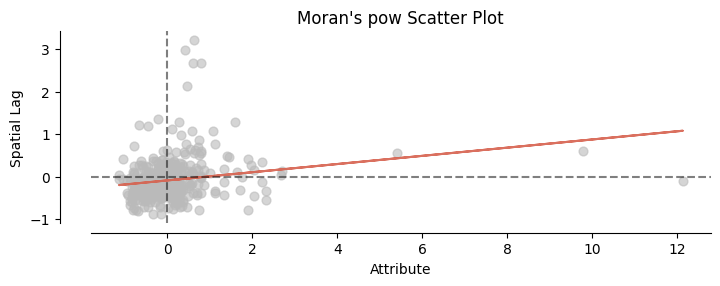

In [42]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

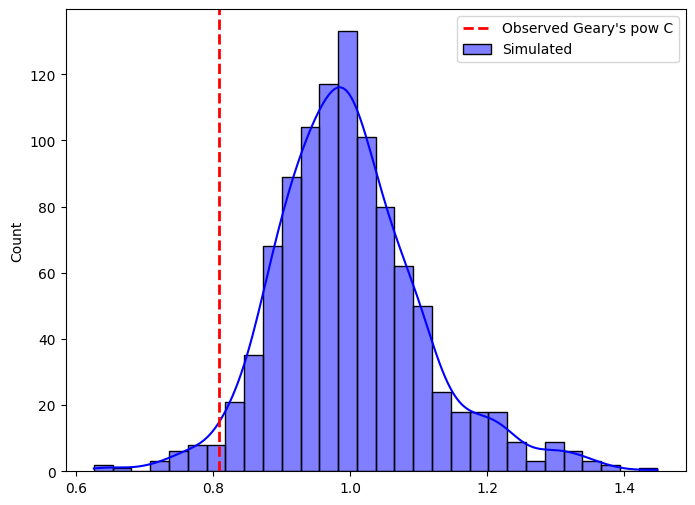

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

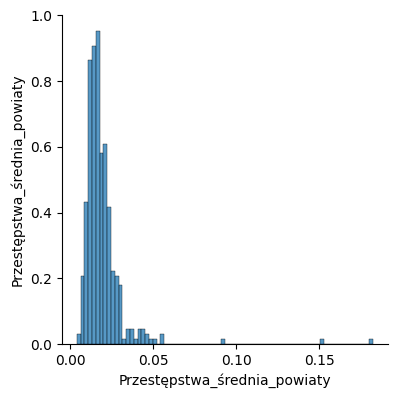

In [44]:
sns.pairplot(pow, height=4)  
plt.show()


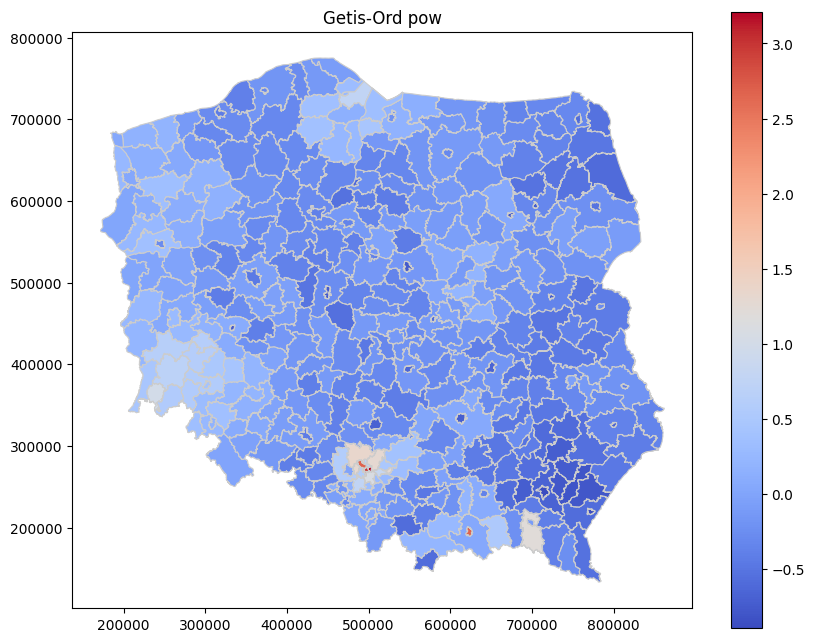

In [45]:
merged_pow['GetisOrd_G_Z'] = g_local_pow.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

Analiza przy użyciu macierzy wag opartych na liczbie najbliższych sąsiadów

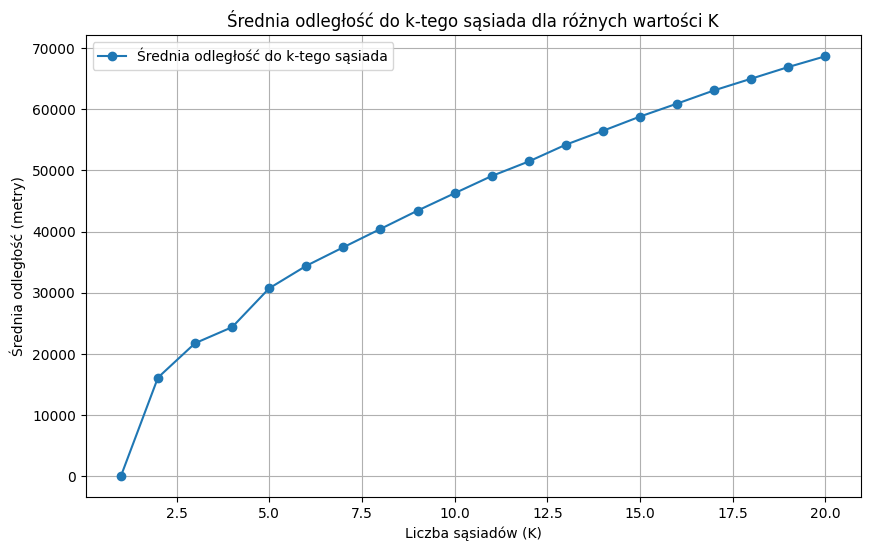

In [46]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Wyciągnięcie współrzędnych centroidów
centroids = merged_pow.geometry.centroid
coords = np.array([[point.x, point.y] for point in centroids])

# Zakres wartości K
k_values = range(1, 21)  

avg_distances = []

for k in k_values:
 
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(coords)
    
  
    distances, indices = knn.kneighbors(coords)
    
   
    avg_distance = np.mean(distances[:, -1])  
    avg_distances.append(avg_distance)


plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_distances, marker='o', label='Średnia odległość do k-tego sąsiada')
plt.xlabel('Liczba sąsiadów (K)')
plt.ylabel('Średnia odległość (metry)')
plt.title('Średnia odległość do k-tego sąsiada dla różnych wartości K')
plt.grid(True)
plt.legend()
plt.show()


In [47]:
from libpysal.weights import KNN
from esda.moran import Moran
import numpy as np


data_column = 'Przestępstwa_średnia_powiaty'
k = 7
w_knn = KNN.from_dataframe(merged_pow, k=k)

y_knn = merged_pow[data_column]

In [48]:
y_knn = merged_pow[data_column]
moran_pow_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)         
print("Z(I):", moran_pow_knn.z_norm)          
print("p-value:", moran_pow_knn.p_norm)       

Moran's I: 0.10907703147447807
E(I): -0.00228310502283105
Var(I): 0.000584824108221159
Z(I): 4.604867315518955
p-value: 4.127289257888758e-06


In [49]:
geary_pow_knn = Geary(y_knn, w_knn)
print("Geary's C:", geary_pow_knn.C)           
print("E(C):", geary_pow_knn.EC)               
print("Var(C):", geary_pow_knn.VC_norm)        
print("Z(C):", geary_pow_knn.z_norm)            
print("p-value:", geary_pow_knn.p_norm)        

Geary's C: 1.0275393882711046
E(C): 1.0
Var(C): 0.0006778907580732869
Z(C): 1.057729050909316
p-value: 0.14508949342083916


In [50]:
g_pow_knn = G(y_knn, w_knn)
print("G:", g_pow_knn.G)                       
print("E(G):", g_pow_knn.EG)                   
print("Var(G):", g_pow_knn.VG)             
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)             

G: 0.01723073435109275
E(G): 0.01598173515981735
Var(G): 5.42729327084805e-08
Z(G): 5.361304971161418
p-value: 4.1311446485892134e-08


In [51]:
g_local_pow_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_pow_knn.Zs)

Local G* values: [ 1.35001820e+00  1.49352599e+00  1.41454486e+00  1.52572355e+00
  1.32114055e-01  2.75804888e-01  1.97084228e-01  3.07649862e-01
  3.08295080e-01  6.69864754e-02 -2.53246378e-01 -1.75424779e-01
 -5.82619008e-02 -2.17965556e-02  2.11552007e-01  1.46192315e-01
  4.36883057e-02  3.95974631e-01 -3.34905932e-01  2.48956741e-01
  9.16971509e-01  3.98387699e-02  4.07857757e-02  6.53576964e-01
 -3.11118601e-01 -6.40669860e-01  1.46865736e+00  6.97257235e-02
 -7.30359952e-01  3.68133196e-02 -8.33383256e-02  3.44513345e-01
  5.44242124e-02 -1.24452466e-01 -4.71887850e-02 -5.38816872e-01
 -1.81342091e-01 -1.30879756e-01 -4.88833063e-02 -2.82687802e-01
  7.32104605e-02  1.23751297e-01  2.06036164e-01 -1.75093098e-01
 -8.71897800e-02  2.63557574e+00  1.64090889e-01  2.38603913e+00
  8.62686443e-01  3.62653693e-01 -1.85083648e-01  7.51050246e-01
 -2.22366461e-01 -8.41831435e-02 -1.80535145e-01  3.66394232e-02
  1.59242689e+00 -6.98697746e-04 -1.75066976e-01 -1.77133459e-01
  1.7996

In [53]:
results_knn = pd.DataFrame({"Statystyka": ["Moran's I", "Geary's C", "Getis-Ord G"],
                            "Wartość": [moran_pow_knn.I, geary_pow_knn.C, g_pow_knn.G],
                            "Wartość oczekiwana": [moran_pow_knn.EI, geary_pow_knn.EC, g_pow_knn.EG],
                            "Wariancja": [moran_pow_knn.VI_norm, geary_pow_knn.VC_norm, g_pow_knn.VG],
                            "Z-score": [moran_pow_knn.z_norm, geary_pow_knn.z_norm, g_pow_knn.z_norm],
                            "p-value": [moran_pow_knn.p_norm, geary_pow_knn.p_norm, g_pow_knn.p_norm]})
print(results_knn)
df_results_knn = pd.DataFrame(results_knn)
output_csv_path_knn2 = "spatial_statistics_summary_knn.csv"
df_results_knn.to_csv(output_csv_path_knn2, index=False)
print(f"Wyniki zapisano do pliku CSV: {output_csv_path_knn2}")


    Statystyka   Wartość  Wartość oczekiwana     Wariancja   Z-score  \
0    Moran's I  0.109077           -0.002283  5.848241e-04  4.604867   
1    Geary's C  1.027539            1.000000  6.778908e-04  1.057729   
2  Getis-Ord G  0.017231            0.015982  5.427293e-08  5.361305   

        p-value  
0  4.127289e-06  
1  1.450895e-01  
2  4.131145e-08  
Wyniki zapisano do pliku CSV: spatial_statistics_summary_knn.csv


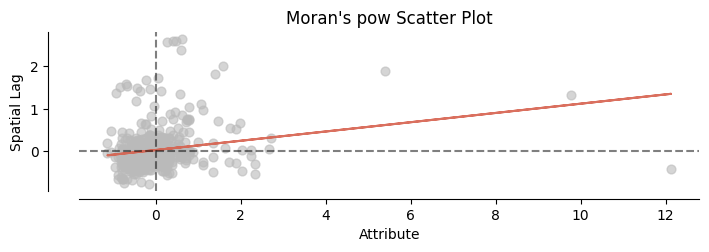

In [54]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow_knn, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

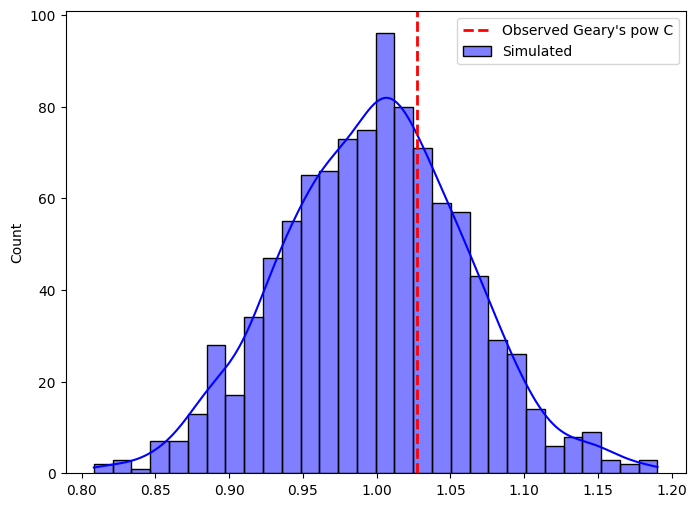

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

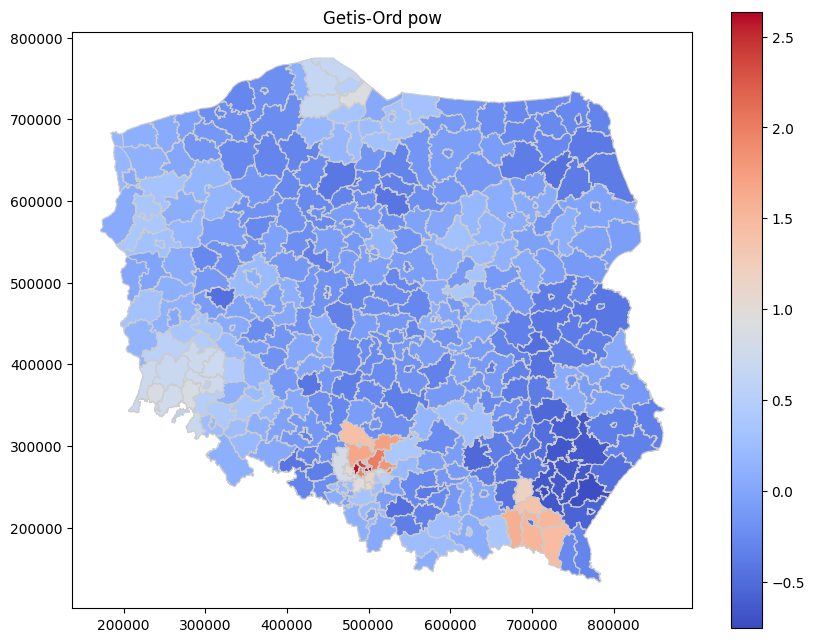

In [56]:
merged_pow['GetisOrd_G_Z'] = g_local_pow_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

#Analiza przy użyciu macierzy wag opartych na odległości 

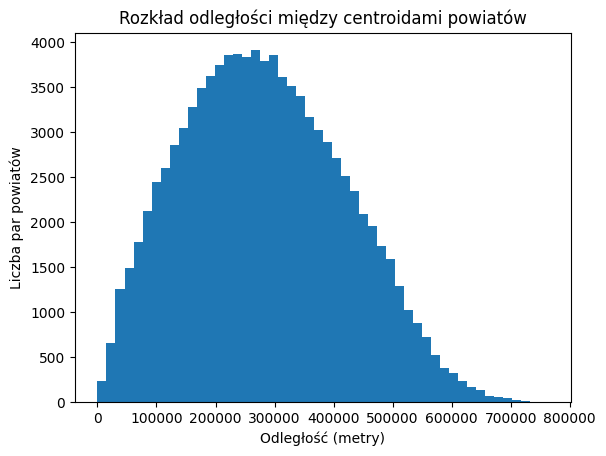

In [57]:
from scipy.spatial.distance import pdist
import numpy as np

# Wyciągnięcie centroidów powiatów
centroids = merged_pow.geometry.centroid

# Obliczenie macierzy odległości między centroidami
coords = np.array([[point.x, point.y] for point in centroids])
distances = pdist(coords)

# Wykres histogramu odległości
plt.hist(distances, bins=50)
plt.xlabel('Odległość (metry)')
plt.ylabel('Liczba par powiatów')
plt.title('Rozkład odległości między centroidami powiatów')
plt.show()


In [58]:
import numpy as np
from libpysal.weights import DistanceBand

max_dist = merged_pow.geometry.centroid.distance(merged_pow.geometry.centroid.unary_union).max()

threshold_distance = 300000 

w_distance = DistanceBand.from_dataframe(merged_pow, threshold=threshold_distance, binary=True, silence_warnings=True)
w_distance.transform = 'r'

moran_distance = Moran(y, w_distance)
print("Moran's I (distance-based weights):", moran_distance.I)
print("E(I):", moran_distance.EI)
print("Var(I):", moran_distance.VI_norm)
print("Z(I):", moran_distance.z_norm)
print("p-value (normal approximation):", moran_distance.p_norm)


geary_distance = Geary(y, w_distance)
print("Geary's C (distance-based weights):", geary_distance.C)
print("E(C):", geary_distance.EC)
print("Var(C):", geary_distance.VC_norm)
print("Z(C):", geary_distance.z_norm)
print("p-value (normal approximation):", geary_distance.p_norm)

g_distance = G(y, w_distance)
print("Getis-Ord G (distance-based weights):", g_distance.G)
print("E(G):", g_distance.EG)
print("Var(G):", g_distance.VG)
print("Z(G):", g_distance.z_norm)
print("p-value (normal approximation):", g_distance.p_norm)


C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\3154601806.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_dist = merged_pow.geometry.centroid.distance(merged_pow.geometry.centroid.unary_union).max()


Moran's I (distance-based weights): 0.005437854297909228
E(I): -0.00228310502283105
Var(I): 8.618248205397388e-06
Z(I): 2.6300364380503045
p-value (normal approximation): 0.008537571675874267
Geary's C (distance-based weights): 0.9584744283237212
E(C): 1.0
Var(C): 7.736199720469879e-05
Z(C): -4.721193314569975
p-value (normal approximation): 1.1723248015143828e-06
Getis-Ord G (distance-based weights): 0.5611145792804787
E(G): 0.5635992968660614
Var(G): 0.000101453990067224
Z(G): -0.24668484394389276
p-value (normal approximation): 0.4025760684613948


#Analiza z wykorzystaniem testów permutacyjnych i różnych macierzy wag

Analiza przy użyciu macierzy wag opartych na liczbie najbliższych sąsiadów

In [59]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=7) 
moran_pow_knn_perm = Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_knn_perm.I)
print("E(I):", moran_pow_knn_perm.EI)
print("Var(I):", moran_pow_knn_perm.VI_norm)
print("Z(I):", moran_pow_knn_perm.z_norm)
print("p-value:", moran_pow_knn_perm.p_norm)      

Moran's I (z permutacjami): 0.10907703147447807
E(I): -0.00228310502283105
Var(I): 0.000584824108221159
Z(I): 4.604867315518955
p-value: 4.127289257888758e-06


In [60]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=7)
geary_pow_knn_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_knn_perm.C)
print("E(C):", geary_pow_knn_perm.EC)
print("Var(C):", geary_pow_knn_perm.VC_norm)
print("Z(C):", geary_pow_knn_perm.z_norm)
print("p-value:", geary_pow_knn_perm.p_norm)        

Geary's C (z permutacjami): 1.0275393882711046
E(C): 1.0
Var(C): 0.0006778907580732869
Z(C): 1.057729050909316
p-value: 0.14508949342083916


In [61]:
y = merged_pow[data_column]
w = weights.KNN.from_dataframe(merged_pow, k=7)  

g_pow_knn_perm = G(y, w, permutations=1000)
print("G (z permutacjami):", g_pow_knn_perm.G)
print("E(G):", g_pow_knn_perm.EG)
print("Var(G):", g_pow_knn_perm.VG)
print("Z(G):", g_pow_knn_perm.z_norm)
print("p-value:", g_pow_knn_perm.p_norm)             

G (z permutacjami): 0.01723073435109275
E(G): 0.01598173515981735
Var(G): 5.42729327084805e-08
Z(G): 5.361304971161418
p-value: 4.1311446485892134e-08


#Analiza przy użyciu binarnej macierzy sąsiedztwa 

In [62]:
y = merged_pow[data_column]

moran_pow_queen_perm= Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_queen_perm.I)
print("E(I):", moran_pow_queen_perm.EI)
print("Var(I):", moran_pow_queen_perm.VI_norm)
print("Z(I):", moran_pow_queen_perm.z_norm)
print("p-value:", moran_pow_queen_perm.p_norm)       

Moran's I (z permutacjami): 0.10907703147447807
E(I): -0.00228310502283105
Var(I): 0.000584824108221159
Z(I): 4.604867315518955
p-value: 4.127289257888758e-06


In [63]:
geary_pow_queen_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_queen_perm.C)
print("E(C):", geary_pow_queen_perm.EC)
print("Var(C):", geary_pow_queen_perm.VC_norm)
print("Z(C):", geary_pow_queen_perm.z_norm)
print("p-value:", geary_pow_queen_perm.p_norm)       

Geary's C (z permutacjami): 1.0275393882711046
E(C): 1.0
Var(C): 0.0006778907580732869
Z(C): 1.057729050909316
p-value: 0.14508949342083916


In [64]:
g_pow_queen_perm = G(y, w, permutations=1000)

print("G (z permutacjami):", g_pow_queen_perm.G)
print("E(G):", g_pow_queen_perm.EG)
print("Var(G):", g_pow_queen_perm.VG)
print("Z(G):", g_pow_queen_perm.z_norm)
print("p-value:", g_pow_queen_perm.p_norm)         

G (z permutacjami): 0.01723073435109275
E(G): 0.01598173515981735
Var(G): 5.42729327084805e-08
Z(G): 5.361304971161418
p-value: 4.1311446485892134e-08


Analiza przy użyciu macierzy wag opartych na odległości

In [65]:
y=merged_pow[data_column]
threshold_distance = 30000  # w metrach (30 km)
w_distance = DistanceBand.from_dataframe(
    merged_pow, 
    threshold=threshold_distance, 
    binary=True, 
    silence_warnings=True
)
w_distance.transform = 'r'
moran_pow_distance_perm = Moran(y, w_distance, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_distance_perm.I)
print("E(I):", moran_pow_distance_perm.EI)
print("Var(I):", moran_pow_distance_perm.VI_norm)
print("Z(I):", moran_pow_distance_perm.z_norm)
print("p-value:", moran_pow_distance_perm.p_norm)


Moran's I (z permutacjami): 0.10291446192481742
E(I): -0.00228310502283105
Var(I): 0.002131657552223204
Z(I): 2.2784892127870533
p-value: 0.022697446479401157


In [66]:
geary_pow_distance_perm = Geary(y, w_distance, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_distance_perm.C)
print("E(C):", geary_pow_distance_perm.EC)
print("Var(C):", geary_pow_distance_perm.VC_norm)
print("Z(C):", geary_pow_distance_perm.z_norm)
print("p-value:", geary_pow_distance_perm.p_norm)

Geary's C (z permutacjami): 1.1517934219219519
E(C): 1.0
Var(C): 0.0031555975175071357
Z(C): 2.7021667681927983
p-value: 0.003444459990787074


In [67]:
getis_pow_distance_perm = G(y, w_distance, permutations=1000)
print("Getis-Ord G (z permutacjami):", getis_pow_distance_perm.G)
print("E(G):", getis_pow_distance_perm.EG)
print("Var(G):", getis_pow_distance_perm.VG)
print("Z(G):", getis_pow_distance_perm.z_norm)
print("p-value:", getis_pow_distance_perm.p_norm)

Getis-Ord G (z permutacjami): 0.011776224398629109
E(G): 0.007697028322983951
Var(G): 2.971930179328415e-07
Z(G): 7.482647388686264
p-value: 3.6415315207705135e-14


Analiza danych dla województwa małopolskiego

In [101]:
pow_mal = pd.read_csv("przestepstwa_pow.csv")
pow_mal_map = "powiaty.shp"
pow_mal_m = gpd.read_file(pow_mal_map)

In [69]:
pow_mal.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow_mal.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow_mal.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow_mal = pow_mal[pow_mal['Województwo'].isin(['małopolskie'])]
pow_mal

,JPT_NAZWA_,Województwo,Przestępstwa_powiaty
0,nowosądecki,małopolskie,11958.0
1,tarnowski,małopolskie,2860.0
16,nowotarski,małopolskie,2195.0
19,krakowski,małopolskie,4366.0
20,Tarnów,małopolskie,2522.0
30,chrzanowski,małopolskie,2264.0
54,bocheński,małopolskie,2036.0
55,miechowski,małopolskie,843.0
56,myślenicki,małopolskie,1341.0
57,proszowicki,małopolskie,313.0


In [70]:
pow_mal.describe()

,Przestępstwa_powiaty
count,22.000000
mean,3144.272727
std,3965.460259
min,313.000000
25%,1498.750000
50%,2132.000000
75%,2640.500000
max,17617.000000


In [71]:
pow_mal_m['JPT_NAZWA_'] = pow_mal_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [72]:
pow_mal['JPT_NAZWA_'] = pow_mal['JPT_NAZWA_'].str.strip()
ludnosc_pow['JPT_NAZWA_'] = ludnosc_pow['JPT_NAZWA_'].str.strip()

In [73]:
merged_df_mal = pow_mal.merge(ludnosc_pow, on='JPT_NAZWA_')

In [74]:
merged_df_mal['Przestępstwa_średnia_powiaty'] = (merged_df_mal['Przestępstwa_powiaty'] / merged_df_mal['Ludnosc_powiaty'])

In [76]:
print(merged_df_mal[['JPT_NAZWA_', 'Województwo', 'Przestępstwa_powiaty', 'Ludnosc_powiaty', 'Przestępstwa_średnia_powiaty']])

     JPT_NAZWA_  Województwo  Przestępstwa_powiaty  Ludnosc_powiaty  \
0   nowosądecki  małopolskie               11958.0           216796   
1     tarnowski  małopolskie                2860.0           201497   
2    nowotarski  małopolskie                2195.0           191782   
3     krakowski  małopolskie                4366.0           279239   
4        Tarnów  małopolskie                2522.0           108470   
5   chrzanowski  małopolskie                2264.0           124536   
6     bocheński  małopolskie                2036.0           106858   
7    miechowski  małopolskie                 843.0            48818   
8    myślenicki  małopolskie                1341.0           127600   
9   proszowicki  małopolskie                 313.0            43222   
10     wielicki  małopolskie                2069.0           129136   
11       Kraków  małopolskie               17617.0           779115   
12     gorlicki  małopolskie                2680.0           108886   
13   l

In [75]:
pow_mal = merged_df_mal[merged_df_mal['Województwo'] == 'małopolskie'][['JPT_NAZWA_', 'Województwo', 'Przestępstwa_średnia_powiaty']]
print(pow_mal)

     JPT_NAZWA_  Województwo  Przestępstwa_średnia_powiaty
0   nowosądecki  małopolskie                      0.055158
1     tarnowski  małopolskie                      0.014194
2    nowotarski  małopolskie                      0.011445
3     krakowski  małopolskie                      0.015635
4        Tarnów  małopolskie                      0.023251
5   chrzanowski  małopolskie                      0.018179
6     bocheński  małopolskie                      0.019053
7    miechowski  małopolskie                      0.017268
8    myślenicki  małopolskie                      0.010509
9   proszowicki  małopolskie                      0.007242
10     wielicki  małopolskie                      0.016022
11       Kraków  małopolskie                      0.022612
12     gorlicki  małopolskie                      0.024613
13   limanowski  małopolskie                      0.011164
14    Nowy Sącz  małopolskie                      0.029775
15      olkuski  małopolskie                      0.0161

In [77]:
print(pow_mal.sort_values(by='Przestępstwa_średnia_powiaty', ascending=False))

     JPT_NAZWA_  Województwo  Przestępstwa_średnia_powiaty
0   nowosądecki  małopolskie                      0.055158
14    Nowy Sącz  małopolskie                      0.029775
19      brzeski  małopolskie                      0.027059
18      brzeski  małopolskie                      0.026073
12     gorlicki  małopolskie                      0.024613
4        Tarnów  małopolskie                      0.023251
22   tatrzański  małopolskie                      0.023240
11       Kraków  małopolskie                      0.022612
6     bocheński  małopolskie                      0.019053
16  oświęcimski  małopolskie                      0.018282
5   chrzanowski  małopolskie                      0.018179
7    miechowski  małopolskie                      0.017268
15      olkuski  małopolskie                      0.016113
10     wielicki  małopolskie                      0.016022
3     krakowski  małopolskie                      0.015635
1     tarnowski  małopolskie                      0.0141

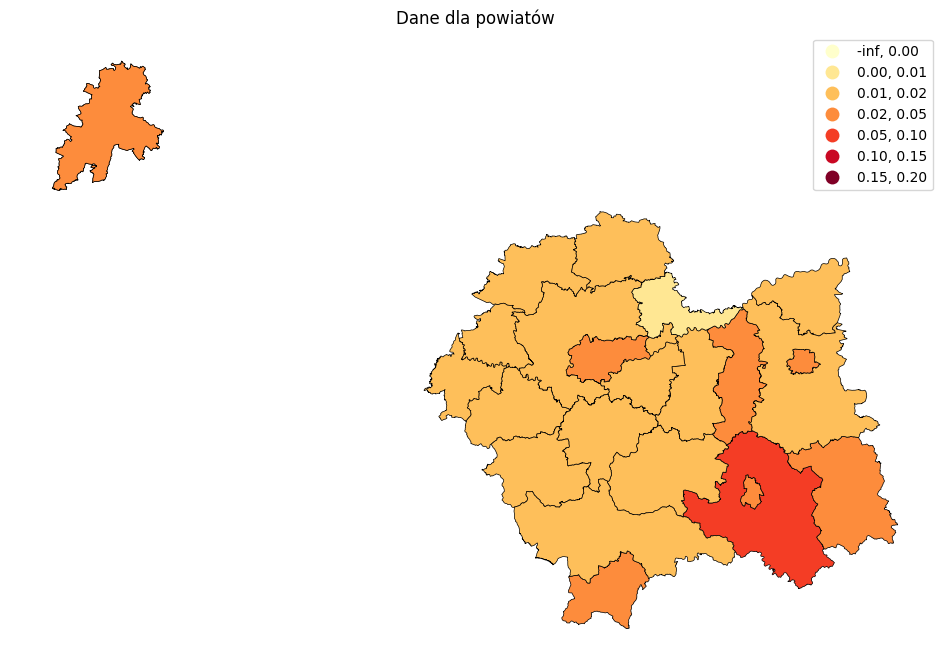

In [78]:
merged_pow_mal = pow_mal_m.merge(pow_mal, on='JPT_NAZWA_')


bins = [0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]  # Przedziały wartości

# Dodanie kolumny z kategoryzacją danych
merged_pow_mal['Kategoria'] = np.digitize(
    merged_pow_mal['Przestępstwa_średnia_powiaty'], bins
)

# Tworzenie mapy z nową skalą
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow_mal.plot(
    column='Przestępstwa_średnia_powiaty',
    cmap='YlOrRd',  # Paleta kolorów
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    scheme='UserDefined',  # Użycie własnych przedziałów
    classification_kwds={'bins': bins},  # Określenie przedziałów
    ax=ax
)
ax.set_axis_off()
plt.title('Dane dla powiatów')
plt.show()

In [79]:
data_column = 'Przestępstwa_średnia_powiaty'

w = weights.Queen.from_dataframe(merged_pow_mal)
w.transform = 'r'

C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\3911756976.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_pow_mal)
c:\Users\KamilSarzyniak\anaconda3\envs\py10\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [80]:
y = merged_pow_mal[data_column]
moran_pow = Moran(y, w)
print("Moran's I:", moran_pow.I)           # Wartość statystyki Moran's I
print("E(I):", moran_pow.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_pow.VI_norm)         # Wariancja Var(I)
print("Z(I):", moran_pow.z_norm)            # Statystyka Z(I)
print("p-value:", moran_pow.p_norm)         # Wartość p

Moran's I: 0.30755867278804816
E(I): -0.041666666666666664
Var(I): 0.02381205762931953
Z(I): 2.2631184525020793
p-value: 0.023628388353922117


In [81]:
geary_pow = Geary(y, w)
print("Geary's C:", geary_pow.C)           
print("E(C):", geary_pow.EC)              
print("Var(C):", geary_pow.VC_norm)            
print("Z(C):", geary_pow.z_norm)               
print("p-value:", geary_pow.p_norm)         

Geary's C: 1.0324780792916746
E(C): 1.0
Var(C): 0.03241639909297051
Z(C): 0.1803881283570999
p-value: 0.4284239368250596


In [82]:
g_pow = G(y, w)
print("G:", g_pow.G)                      
print("E(G):", g_pow.EG)                   
print("Var(G):", g_pow.VG)                
print("Z(G):", g_pow.z_norm)                
print("p-value:", g_pow.p_norm)              

G: 0.1655688300122083
E(G): 0.17
Var(G): 0.0003898675851302068
Z(G): -0.22441911566276218
p-value: 0.4112155989231425


In [83]:
g_local_pow = G_Local(y, w)
print("Local G* values:", g_local_pow.Zs)

Local G* values: [ 0.35744619 -0.56932981  0.28483907  0.27285204  0.77932863  0.68301833
 -0.69848549  1.56047959 -0.5678887  -0.61618819  0.53889182 -0.37433414
 -0.96087868 -0.48312832  0.49219634 -0.68847767 -0.30696049 -0.5405504
  3.77583508 -0.85382682  0.2203909  -0.00976312 -0.3151975  -0.71819489
 -0.47609089]


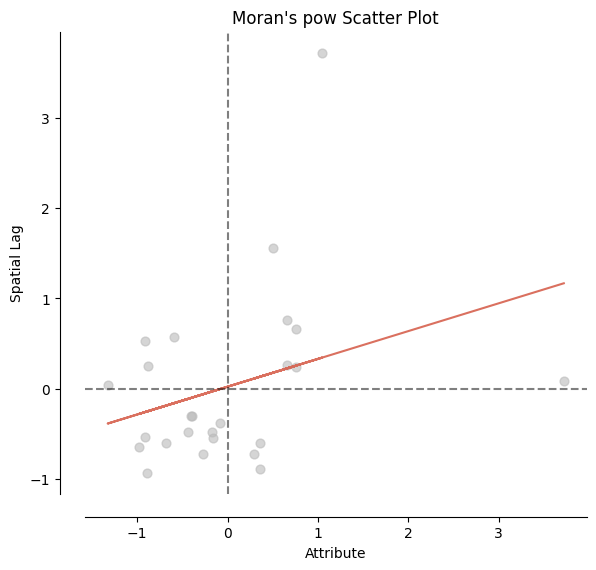

In [84]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

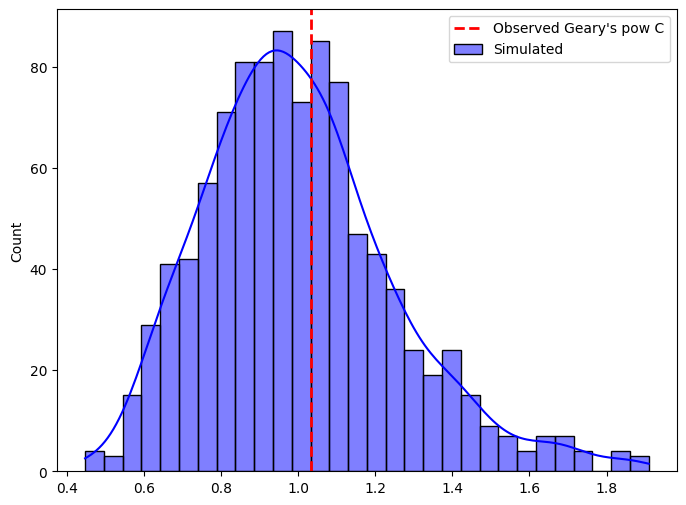

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

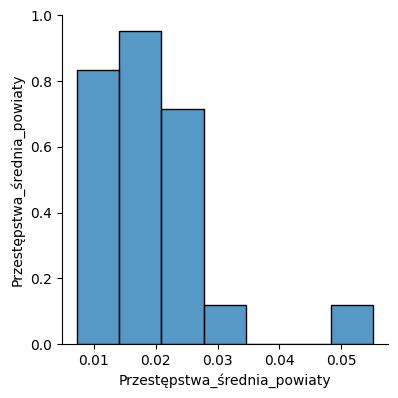

In [87]:
sns.pairplot(pow_mal, height=4)  
plt.show()

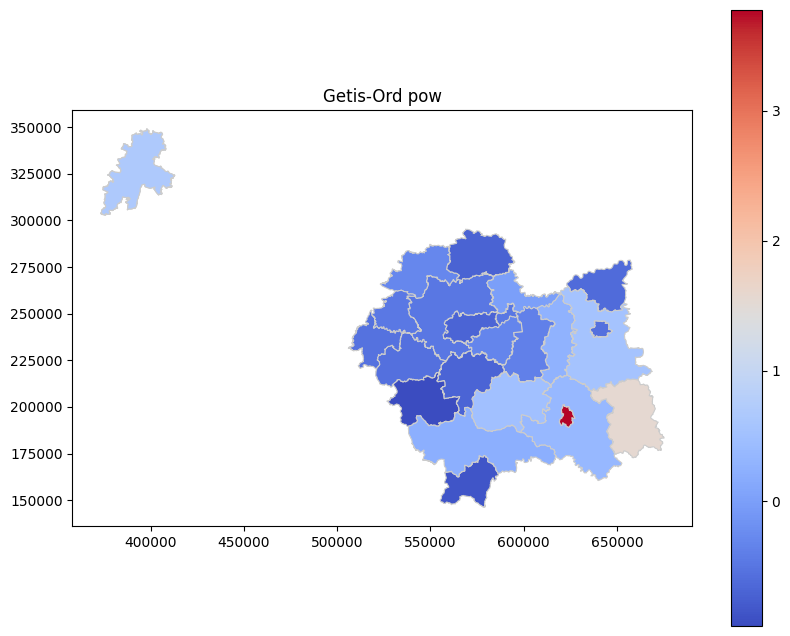

In [88]:
merged_pow_mal['GetisOrd_G_Z'] = g_local_pow.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow_mal.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

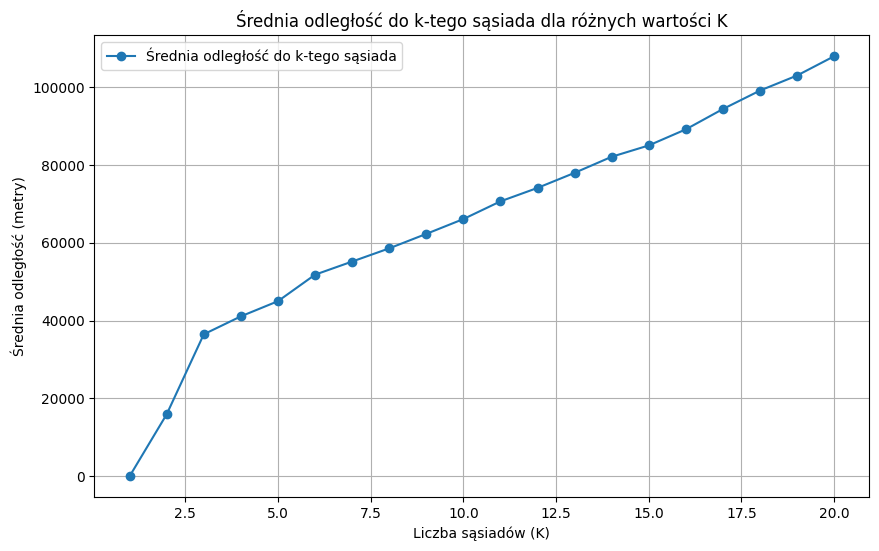

In [89]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Wyciągnięcie współrzędnych centroidów
centroids = merged_pow_mal.geometry.centroid
coords = np.array([[point.x, point.y] for point in centroids])

# Zakres wartości K
k_values = range(1, 21)  

avg_distances = []

for k in k_values:
 
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(coords)
    
  
    distances, indices = knn.kneighbors(coords)
    
   
    avg_distance = np.mean(distances[:, -1])  
    avg_distances.append(avg_distance)


plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_distances, marker='o', label='Średnia odległość do k-tego sąsiada')
plt.xlabel('Liczba sąsiadów (K)')
plt.ylabel('Średnia odległość (metry)')
plt.title('Średnia odległość do k-tego sąsiada dla różnych wartości K')
plt.grid(True)
plt.legend()
plt.show()


In [90]:
from libpysal.weights import KNN
from esda.moran import Moran
import numpy as np


data_column = 'Przestępstwa_średnia_powiaty'
k = 7
w_knn = KNN.from_dataframe(merged_pow_mal, k=k)

y_knn = merged_pow_mal[data_column]

In [91]:
y_knn = merged_pow_mal[data_column]
moran_pow_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)         
print("Z(I):", moran_pow_knn.z_norm)          
print("p-value:", moran_pow_knn.p_norm)

Moran's I: 0.07749218827479303
E(I): -0.041666666666666664
Var(I): 0.0059980594802023415
Z(I): 1.5385830268270388
p-value: 0.12390612483208024


In [92]:
g_pow_knn = G(y_knn, w_knn)
print("G:", g_pow_knn.G)                       
print("E(G):", g_pow_knn.EG)                   
print("Var(G):", g_pow_knn.VG)             
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)

G: 0.2807965488188204
E(G): 0.2916666666666667
Var(G): 0.0001998262757588326
Z(G): -0.7689674475216884
p-value: 0.22095631771404411


In [93]:
g_local_pow_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_pow_knn.Zs)

Local G* values: [ 0.52992182 -0.09232678 -0.250497   -0.26171131 -0.19859846 -0.20964981
 -0.60805711  0.7294759  -0.43210558 -0.1168353   0.33729024 -0.27145019
 -0.56961814 -0.46627632  0.39997187 -0.58347441 -0.43743528 -0.49787965
  0.62422637  0.03998244  0.23874365  0.01824044 -0.17440131 -0.36552806
 -0.49684818]


In [94]:
results_knn = pd.DataFrame({"Statystyka": ["Moran's I", "Geary's C", "Getis-Ord G"],
                            "Wartość": [moran_pow_knn.I, geary_pow_knn.C, g_pow_knn.G],
                            "Wartość oczekiwana": [moran_pow_knn.EI, geary_pow_knn.EC, g_pow_knn.EG],
                            "Wariancja": [moran_pow_knn.VI_norm, geary_pow_knn.VC_norm, g_pow_knn.VG],
                            "Z-score": [moran_pow_knn.z_norm, geary_pow_knn.z_norm, g_pow_knn.z_norm],
                            "p-value": [moran_pow_knn.p_norm, geary_pow_knn.p_norm, g_pow_knn.p_norm]})
print(results_knn)
df_results_knn = pd.DataFrame(results_knn)
output_csv_path_knn_mal = "spatial_statistics_summary_knn_mal.csv"
df_results_knn.to_csv(output_csv_path_knn_mal, index=False)
print(f"Wyniki zapisano do pliku CSV: {output_csv_path_knn_mal}")

    Statystyka   Wartość  Wartość oczekiwana  Wariancja   Z-score   p-value
0    Moran's I  0.077492           -0.041667   0.005998  1.538583  0.123906
1    Geary's C  1.027539            1.000000   0.000678  1.057729  0.145089
2  Getis-Ord G  0.280797            0.291667   0.000200 -0.768967  0.220956
Wyniki zapisano do pliku CSV: spatial_statistics_summary_knn_mal.csv


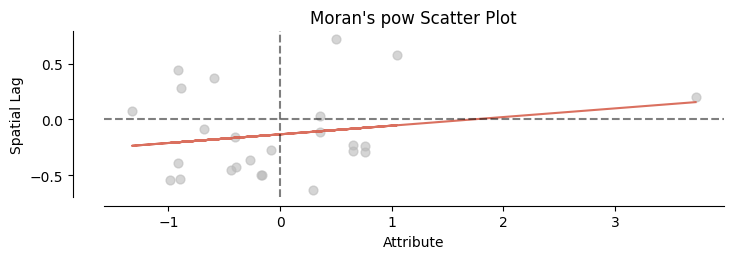

In [95]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow_knn, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

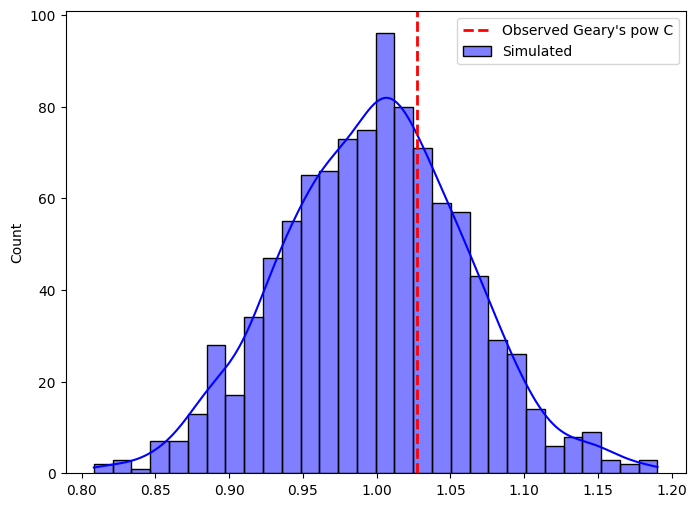

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

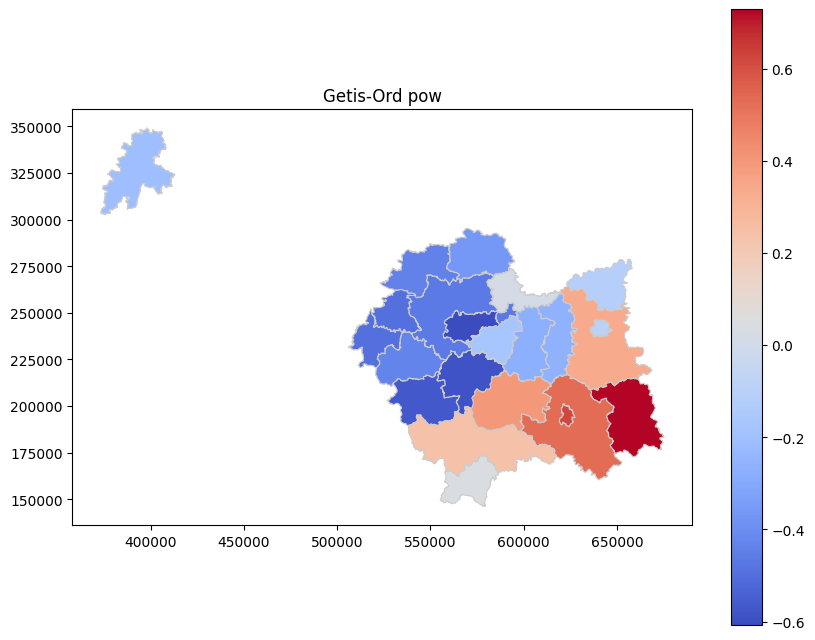

In [97]:
merged_pow_mal['GetisOrd_G_Z'] = g_local_pow_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow_mal.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

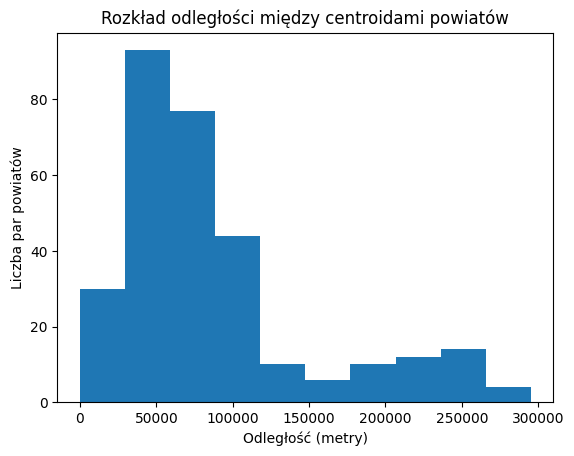

In [99]:
from scipy.spatial.distance import pdist
import numpy as np

# Wyciągnięcie centroidów powiatów
centroids = merged_pow_mal.geometry.centroid

# Obliczenie macierzy odległości między centroidami
coords = np.array([[point.x, point.y] for point in centroids])
distances = pdist(coords)

# Wykres histogramu odległości
plt.hist(distances, bins=10)
plt.xlabel('Odległość (metry)')
plt.ylabel('Liczba par powiatów')
plt.title('Rozkład odległości między centroidami powiatów')
plt.show()

Analiza danych dla województwa podkarpackiego

In [100]:
pow_pod = pd.read_csv("przestepstwa_pow.csv")
pow_pod_map = "powiaty.shp"
pow_pod_m = gpd.read_file(pow_map)

In [102]:
pow_pod.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)
pow_pod.rename(columns={'powiat': 'JPT_NAZWA_'}, inplace=True)
pow_pod.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem': 'Przestępstwa_powiaty'
}, inplace=True)
pow_pod = pow_pod[pow_pod['Województwo'].isin(['podkarpackie'])]
pow_pod

,JPT_NAZWA_,Województwo,Przestępstwa_powiaty
26,Przemyśl,podkarpackie,885.0
41,Krosno,podkarpackie,8448.0
47,Tarnobrzeg,podkarpackie,982.0
308,bieszczadzki,podkarpackie,308.0
309,brzozowski,podkarpackie,512.0
310,jasielski,podkarpackie,1110.0
311,krośnieński,podkarpackie,1135.0
312,sanocki,podkarpackie,1650.0
313,leski,podkarpackie,310.0
314,jarosławski,podkarpackie,1105.0


In [103]:
pow_pod.describe()

,Przestępstwa_powiaty
count,25.000000
mean,1288.560000
std,1620.981006
min,308.000000
25%,605.000000
50%,885.000000
75%,1247.000000
max,8448.000000


In [104]:
pow_pod_m['JPT_NAZWA_'] = pow_pod_m['JPT_NAZWA_'].str.replace('powiat ', '', regex=False)

In [105]:
file_path = 'ludnosc.csv'


df = pd.read_csv(file_path)
df.columns = df.columns.str.strip() 


ludnosc_pow = pd.DataFrame({
    'JPT_NAZWA_': df['Powiaty'],
    'Ludnosc_powiaty': df['Ludnosc']
})


print(ludnosc_pow)

            JPT_NAZWA_  Ludnosc_powiaty
0        bolesławiecki            90103
1       dzierżoniowski           100813
2            głogowski            89102
3             górowski            34870
4             jaworski            50116
..                 ...              ...
375         świdwiński            46724
376            wałecki            53039
377           Koszalin           107048
378           Szczecin           401907
379        Świnoujście            40888

[380 rows x 2 columns]


In [106]:
print(pow_pod)

                 JPT_NAZWA_   Województwo  Przestępstwa_powiaty
26                 Przemyśl  podkarpackie                 885.0
41                   Krosno  podkarpackie                8448.0
47               Tarnobrzeg  podkarpackie                 982.0
308            bieszczadzki  podkarpackie                 308.0
309              brzozowski  podkarpackie                 512.0
310               jasielski  podkarpackie                1110.0
311             krośnieński  podkarpackie                1135.0
312                 sanocki  podkarpackie                1650.0
313                   leski  podkarpackie                 310.0
314             jarosławski  podkarpackie                1105.0
315             lubaczowski  podkarpackie                 477.0
316               przemyski  podkarpackie                 532.0
317              przeworski  podkarpackie                 783.0
318            kolbuszowski  podkarpackie                 605.0
319                łańcucki  podkarpacki

In [107]:
pow_pod['JPT_NAZWA_'] = pow_pod['JPT_NAZWA_'].str.strip()
ludnosc_pow['JPT_NAZWA_'] = ludnosc_pow['JPT_NAZWA_'].str.strip()

In [109]:
merged_df_pod = pow_pod.merge(ludnosc_pow, on='JPT_NAZWA_')

In [110]:
merged_df_pod['Przestępstwa_średnia_powiaty'] = (merged_df_pod['Przestępstwa_powiaty'] / merged_df_pod['Ludnosc_powiaty'])

In [111]:
print(merged_df_pod[['JPT_NAZWA_', 'Województwo', 'Przestępstwa_powiaty', 'Ludnosc_powiaty', 'Przestępstwa_średnia_powiaty']])

                JPT_NAZWA_   Województwo  Przestępstwa_powiaty  \
0                 Przemyśl  podkarpackie                 885.0   
1                   Krosno  podkarpackie                8448.0   
2               Tarnobrzeg  podkarpackie                 982.0   
3             bieszczadzki  podkarpackie                 308.0   
4               brzozowski  podkarpackie                 512.0   
5                jasielski  podkarpackie                1110.0   
6              krośnieński  podkarpackie                1135.0   
7              krośnieński  podkarpackie                1135.0   
8                  sanocki  podkarpackie                1650.0   
9                    leski  podkarpackie                 310.0   
10             jarosławski  podkarpackie                1105.0   
11             lubaczowski  podkarpackie                 477.0   
12               przemyski  podkarpackie                 532.0   
13              przeworski  podkarpackie                 783.0   
14        

In [112]:
pow_pod = merged_df_pod[merged_df_pod['Województwo'] == 'podkarpackie'][['JPT_NAZWA_', 'Województwo', 'Przestępstwa_średnia_powiaty']]
print(pow_pod)

                JPT_NAZWA_   Województwo  Przestępstwa_średnia_powiaty
0                 Przemyśl  podkarpackie                      0.014583
1                   Krosno  podkarpackie                      0.182498
2               Tarnobrzeg  podkarpackie                      0.021008
3             bieszczadzki  podkarpackie                      0.014217
4               brzozowski  podkarpackie                      0.007809
5                jasielski  podkarpackie                      0.009784
6              krośnieński  podkarpackie                      0.020701
7              krośnieński  podkarpackie                      0.010108
8                  sanocki  podkarpackie                      0.017482
9                    leski  podkarpackie                      0.011724
10             jarosławski  podkarpackie                      0.009189
11             lubaczowski  podkarpackie                      0.008639
12               przemyski  podkarpackie                      0.007183
13    

In [113]:
print(pow_pod.sort_values(by='Przestępstwa_średnia_powiaty', ascending=False))

                JPT_NAZWA_   Województwo  Przestępstwa_średnia_powiaty
1                   Krosno  podkarpackie                      0.182498
2               Tarnobrzeg  podkarpackie                      0.021008
6              krośnieński  podkarpackie                      0.020701
8                  sanocki  podkarpackie                      0.017482
19                 Rzeszów  podkarpackie                      0.017165
0                 Przemyśl  podkarpackie                      0.014583
3             bieszczadzki  podkarpackie                      0.014217
24           stalowowolski  podkarpackie                      0.013712
25            tarnobrzeski  podkarpackie                      0.013235
16  ropczycko-sędziszowski  podkarpackie                      0.013018
20                 dębicki  podkarpackie                      0.012210
23                niżański  podkarpackie                      0.011744
9                    leski  podkarpackie                      0.011724
22    

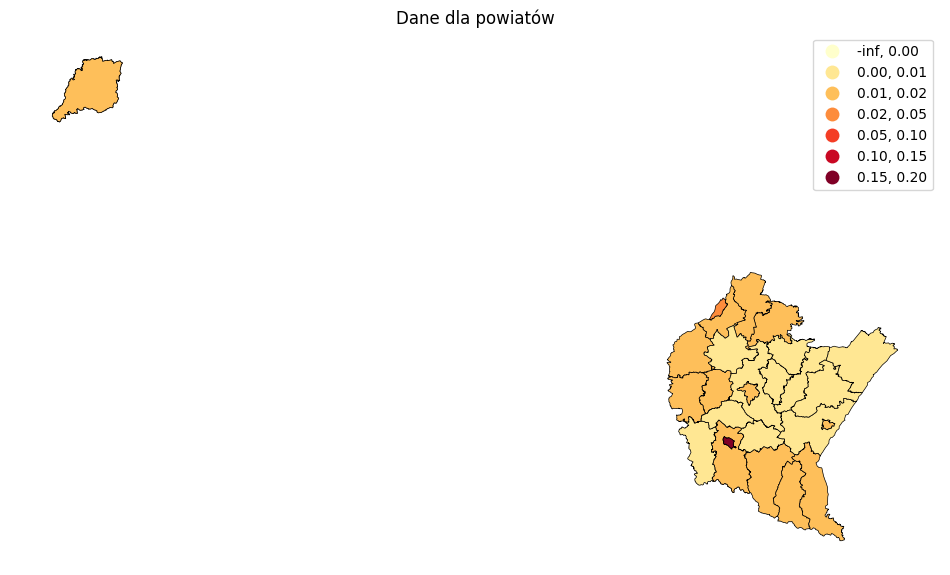

In [114]:
merged_pow_pod = pow_pod_m.merge(pow_pod, on='JPT_NAZWA_')


bins = [0, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2]  # Przedziały wartości

# Dodanie kolumny z kategoryzacją danych
merged_pow_pod['Kategoria'] = np.digitize(
    merged_pow_pod['Przestępstwa_średnia_powiaty'], bins
)

# Tworzenie mapy z nową skalą
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_pow_pod.plot(
    column='Przestępstwa_średnia_powiaty',
    cmap='YlOrRd',  # Paleta kolorów
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    scheme='UserDefined',  # Użycie własnych przedziałów
    classification_kwds={'bins': bins},  # Określenie przedziałów
    ax=ax
)
ax.set_axis_off()
plt.title('Dane dla powiatów')
plt.show()

In [115]:
data_column = 'Przestępstwa_średnia_powiaty'

w = weights.Queen.from_dataframe(merged_pow_pod)
w.transform = 'r'

C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\1174686659.py:3: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(merged_pow_pod)
c:\Users\KamilSarzyniak\anaconda3\envs\py10\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [116]:
y = merged_pow_pod[data_column]
moran_pow = Moran(y, w)
print("Moran's I:", moran_pow.I)           # Wartość statystyki Moran's I
print("E(I):", moran_pow.EI)               # Wartość oczekiwana E(I)
print("Var(I):", moran_pow.VI_norm)         # Wariancja Var(I)
print("Z(I):", moran_pow.z_norm)            # Statystyka Z(I)
print("p-value:", moran_pow.p_norm)         # Wartość p

Moran's I: 0.01855360883418965
E(I): -0.037037037037037035
Var(I): 0.020918682632492674
Z(I): 0.38435678702928083
p-value: 0.7007140242135033


In [117]:
geary_pow_pod = Geary(y, w)
print("Geary's C:", geary_pow.C)           
print("E(C):", geary_pow.EC)              
print("Var(C):", geary_pow.VC_norm)            
print("Z(C):", geary_pow.z_norm)               
print("p-value:", geary_pow.p_norm)  

Geary's C: 1.0324780792916746
E(C): 1.0
Var(C): 0.03241639909297051
Z(C): 0.1803881283570999
p-value: 0.4284239368250596


In [118]:
g_pow_pod = G(y, w)
print("G:", g_pow.G)                      
print("E(G):", g_pow.EG)                   
print("Var(G):", g_pow.VG)                
print("Z(G):", g_pow.z_norm)                
print("p-value:", g_pow.p_norm)   

G: 0.1655688300122083
E(G): 0.17
Var(G): 0.0003898675851302068
Z(G): -0.22441911566276218
p-value: 0.4112155989231425


In [119]:
g_local_pow = G_Local(y, w)
print("Local G* values:", g_local_pow.Zs)

Local G* values: [ 0.64626365  0.68929007 -0.24528686  0.0689512  -0.19199756 -0.34240093
 -0.18687013 -0.3339496  -0.27619937 -0.30350993 -0.1968165  -0.26276224
 -0.20841151 -0.31530643 -0.21506233 -0.26325451 -0.13809196 -0.20957575
 -0.28226954  0.8031471  -0.25478535 -0.07875306 -0.21772089 -0.30514607
 -0.27541357 -0.21680443 -0.19045794 -0.14863567]


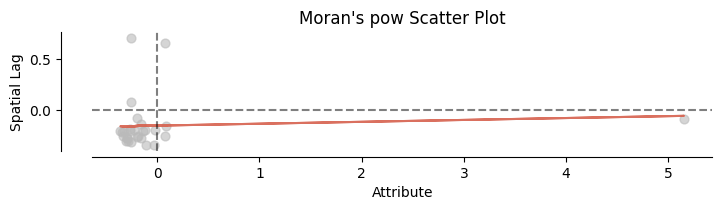

In [121]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

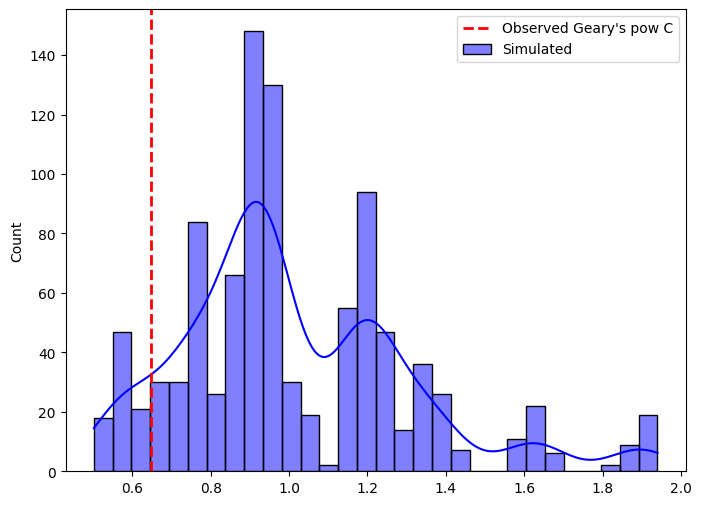

In [124]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_pod.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_pod.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

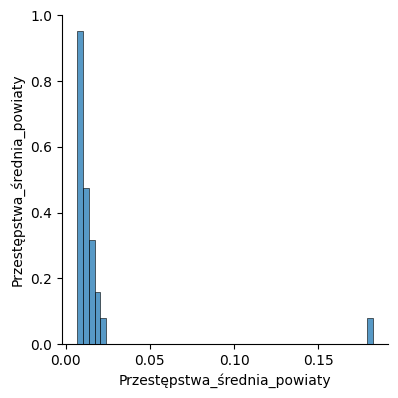

In [125]:
sns.pairplot(pow_pod, height=4)  
plt.show()

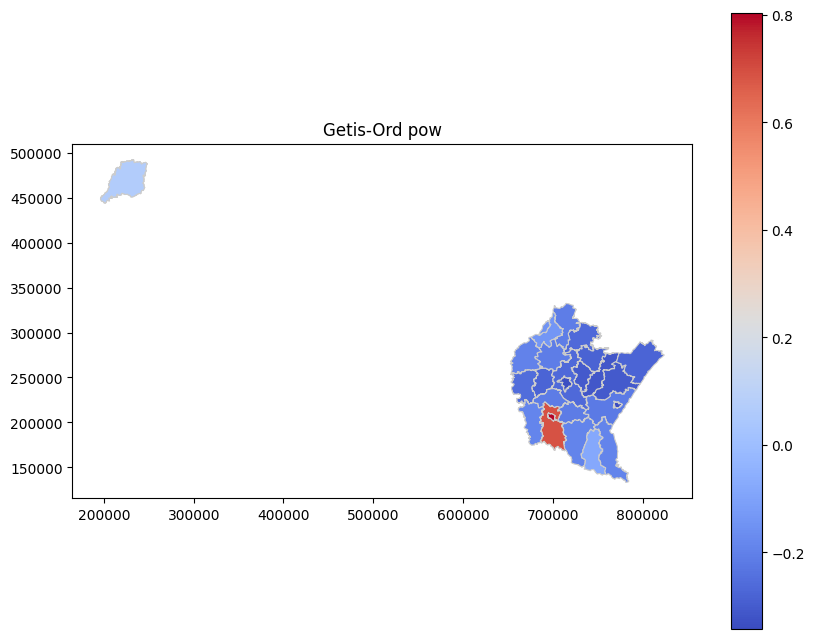

In [126]:
merged_pow_pod['GetisOrd_G_Z'] = g_local_pow.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow_pod.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

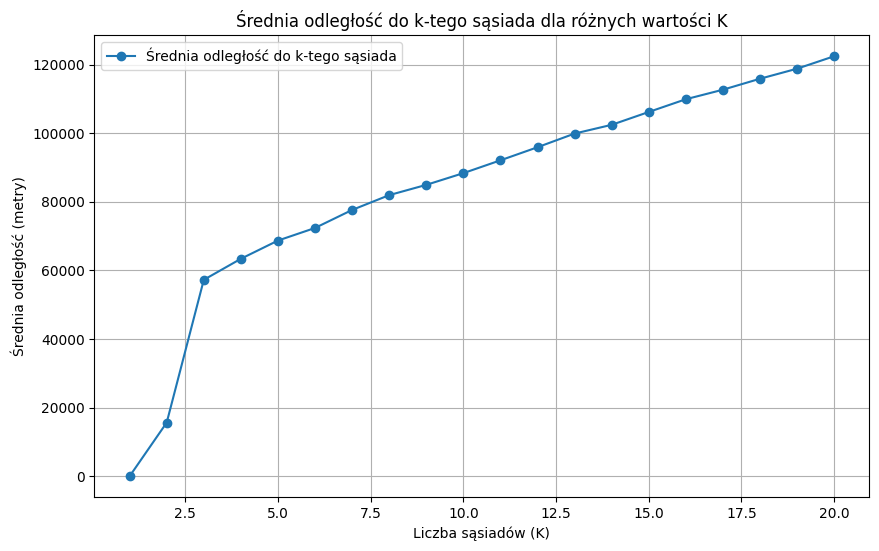

In [127]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Wyciągnięcie współrzędnych centroidów
centroids = merged_pow_pod.geometry.centroid
coords = np.array([[point.x, point.y] for point in centroids])

# Zakres wartości K
k_values = range(1, 21)  

avg_distances = []

for k in k_values:
 
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(coords)
    
  
    distances, indices = knn.kneighbors(coords)
    
   
    avg_distance = np.mean(distances[:, -1])  
    avg_distances.append(avg_distance)


plt.figure(figsize=(10, 6))
plt.plot(k_values, avg_distances, marker='o', label='Średnia odległość do k-tego sąsiada')
plt.xlabel('Liczba sąsiadów (K)')
plt.ylabel('Średnia odległość (metry)')
plt.title('Średnia odległość do k-tego sąsiada dla różnych wartości K')
plt.grid(True)
plt.legend()
plt.show()


In [128]:
from libpysal.weights import KNN
from esda.moran import Moran
import numpy as np


data_column = 'Przestępstwa_średnia_powiaty'
k = 7
w_knn = KNN.from_dataframe(merged_pow_pod, k=k)

y_knn = merged_pow_pod[data_column]

In [129]:
y_knn = merged_pow_pod[data_column]
moran_pow_knn = Moran(y_knn, w_knn)
print("Moran's I:", moran_pow_knn.I)          
print("E(I):", moran_pow_knn.EI)              
print("Var(I):", moran_pow_knn.VI_norm)         
print("Z(I):", moran_pow_knn.z_norm)          
print("p-value:", moran_pow_knn.p_norm) 

Moran's I: -0.03773324167658313
E(I): -0.037037037037037035
Var(I): 0.005909440749277074
Z(I): -0.009056569449841467
p-value: 0.9927740018434089


In [130]:
geary_pow_knn = Geary(y_knn, w_knn)
print("Geary's C:", geary_pow_knn.C)           
print("E(C):", geary_pow_knn.EC)               
print("Var(C):", geary_pow_knn.VC_norm)        
print("Z(C):", geary_pow_knn.z_norm)            
print("p-value:", geary_pow_knn.p_norm) 

Geary's C: 1.067868057581535
E(C): 1.0
Var(C): 0.009000380588547872
Z(C): 0.7153770154625189
p-value: 0.23718805552577632


In [131]:
g_pow_knn = G(y_knn, w_knn)
print("G:", g_pow_knn.G)                       
print("E(G):", g_pow_knn.EG)                   
print("Var(G):", g_pow_knn.VG)             
print("Z(G):", g_pow_knn.z_norm)                
print("p-value:", g_pow_knn.p_norm)   

G: 0.2668855576053467
E(G): 0.25925925925925924
Var(G): 0.001041863891536987
Z(G): 0.23626984578042115
p-value: 0.40661164209069645


In [132]:
g_local_pow_knn = G_Local(y_knn, w_knn)
print("Local G* values:", g_local_pow_knn.Zs)

Local G* values: [ 0.54995076  0.58509827 -0.15613529 -0.12174153  0.55830832 -0.2759005
  0.54471884 -0.28382944  0.51996422 -0.24597775 -0.15858028 -0.19405134
 -0.19583674 -0.24982133  0.58237275 -0.25240533 -0.1738208  -0.1532841
 -0.24710914  0.03415677  0.53335582 -0.16180469 -0.21328658 -0.28483367
 -0.26376902  0.56532295 -0.1698548  -0.19910281]


In [133]:
results_knn = pd.DataFrame({"Statystyka": ["Moran's I", "Geary's C", "Getis-Ord G"],
                            "Wartość": [moran_pow_knn.I, geary_pow_knn.C, g_pow_knn.G],
                            "Wartość oczekiwana": [moran_pow_knn.EI, geary_pow_knn.EC, g_pow_knn.EG],
                            "Wariancja": [moran_pow_knn.VI_norm, geary_pow_knn.VC_norm, g_pow_knn.VG],
                            "Z-score": [moran_pow_knn.z_norm, geary_pow_knn.z_norm, g_pow_knn.z_norm],
                            "p-value": [moran_pow_knn.p_norm, geary_pow_knn.p_norm, g_pow_knn.p_norm]})
print(results_knn)
df_results_knn = pd.DataFrame(results_knn)
output_csv_path_knn3 = "spatial_statistics_summary_knn_pod.csv"
df_results_knn.to_csv(output_csv_path_knn3, index=False)
print(f"Wyniki zapisano do pliku CSV: {output_csv_path_knn3}")

    Statystyka   Wartość  Wartość oczekiwana  Wariancja   Z-score   p-value
0    Moran's I -0.037733           -0.037037   0.005909 -0.009057  0.992774
1    Geary's C  1.067868            1.000000   0.009000  0.715377  0.237188
2  Getis-Ord G  0.266886            0.259259   0.001042  0.236270  0.406612
Wyniki zapisano do pliku CSV: spatial_statistics_summary_knn_pod.csv


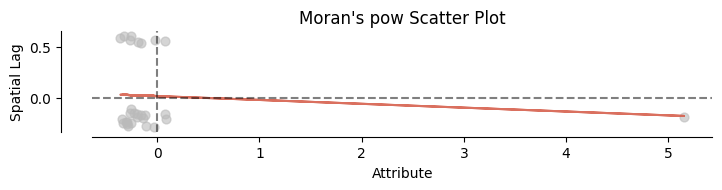

In [134]:
fig, ax = plt.subplots(1, figsize=(8, 6))
moran_scatterplot(moran_pow_knn, ax=ax)
ax.set_title("Moran's pow Scatter Plot")
plt.show()

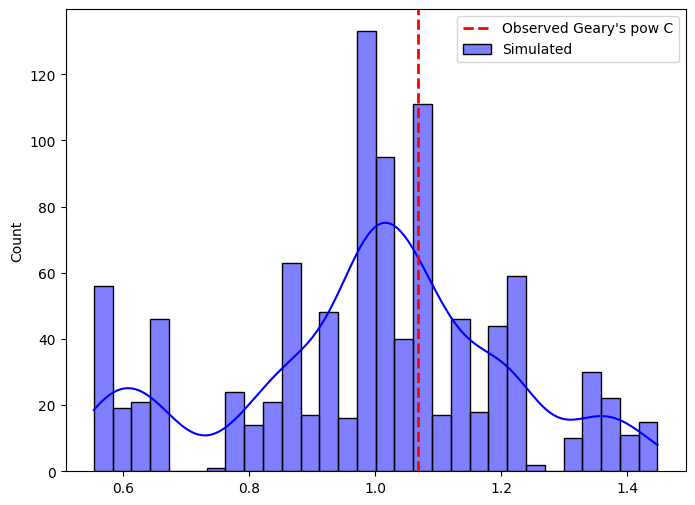

In [135]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(geary_pow_knn.sim, bins=30, kde=True, color='blue', label="Simulated")
plt.axvline(geary_pow_knn.C, color='red', linestyle="--", linewidth=2, label="Observed Geary's pow C")
plt.legend()
plt.show()

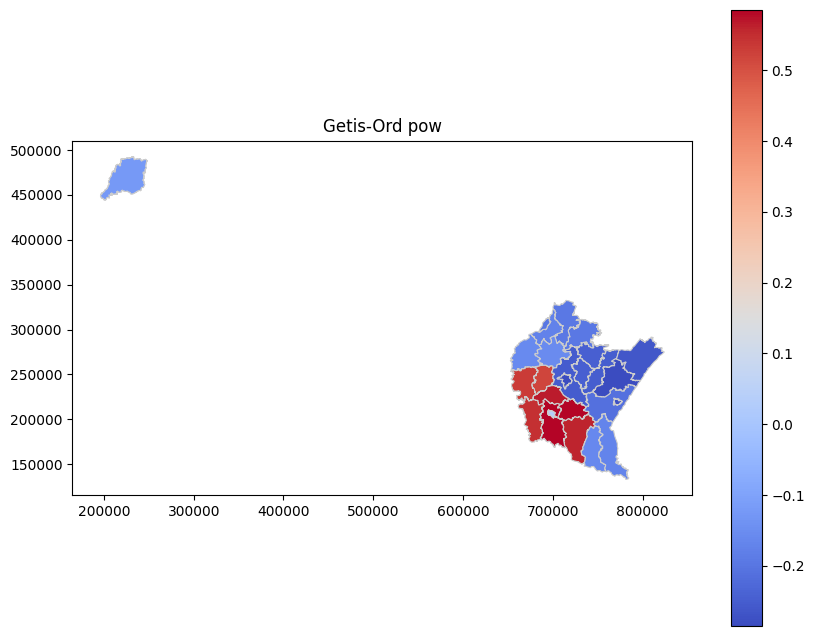

In [136]:
merged_pow_pod['GetisOrd_G_Z'] = g_local_pow_knn.Zs

# Plot Getis-Ord G* Z-scores
fig, ax = plt.subplots(1, figsize=(10, 8))
merged_pow_pod.plot(column='GetisOrd_G_Z', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Getis-Ord pow")
plt.show()

Analiza przy użyciu macierzy wag opartych na odległości

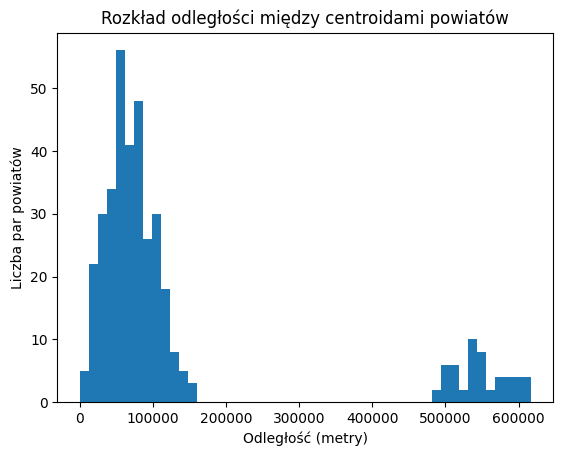

In [139]:
from scipy.spatial.distance import pdist
import numpy as np

# Wyciągnięcie centroidów powiatów
centroids = merged_pow_pod.geometry.centroid

# Obliczenie macierzy odległości między centroidami
coords = np.array([[point.x, point.y] for point in centroids])
distances = pdist(coords)

# Wykres histogramu odległości
plt.hist(distances, bins=50)
plt.xlabel('Odległość (metry)')
plt.ylabel('Liczba par powiatów')
plt.title('Rozkład odległości między centroidami powiatów')
plt.show()

In [140]:
import numpy as np
from libpysal.weights import DistanceBand

max_dist = merged_pow_pod.geometry.centroid.distance(merged_pow_pod.geometry.centroid.unary_union).max()

threshold_distance = 300000 

w_distance = DistanceBand.from_dataframe(merged_pow_pod, threshold=threshold_distance, binary=True, silence_warnings=True)
w_distance.transform = 'r'

moran_distance = Moran(y, w_distance)
print("Moran's I (distance-based weights):", moran_distance.I)
print("E(I):", moran_distance.EI)
print("Var(I):", moran_distance.VI_norm)
print("Z(I):", moran_distance.z_norm)
print("p-value (normal approximation):", moran_distance.p_norm)


geary_distance = Geary(y, w_distance)
print("Geary's C (distance-based weights):", geary_distance.C)
print("E(C):", geary_distance.EC)
print("Var(C):", geary_distance.VC_norm)
print("Z(C):", geary_distance.z_norm)
print("p-value (normal approximation):", geary_distance.p_norm)

g_distance = G(y, w_distance)
print("Getis-Ord G (distance-based weights):", g_distance.G)
print("E(G):", g_distance.EG)
print("Var(G):", g_distance.VG)
print("Z(G):", g_distance.z_norm)
print("p-value (normal approximation):", g_distance.p_norm)

Moran's I (distance-based weights): -0.04286483768019419
E(I): -0.037037037037037035
Var(I): 4.849915850996364e-05
Z(I): -0.8368306633776907
p-value (normal approximation): 0.40268775886669816
Geary's C (distance-based weights): 1.0788627784406613
E(C): 1.0
Var(C): 0.005528626810854925
Z(C): 1.060628849762911
p-value (normal approximation): 0.14442930311356422
Getis-Ord G (distance-based weights): 0.8629932864669515
E(G): 0.8571428571428571
Var(G): 0.014889538237889965
Z(G): 0.047945419465079624
p-value (normal approximation): 0.48087987074602323


C:\Users\KamilSarzyniak\AppData\Local\Temp\ipykernel_13636\774532052.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_dist = merged_pow_pod.geometry.centroid.distance(merged_pow_pod.geometry.centroid.unary_union).max()


Analiza z wykorzystaniem testów permutacyjnych i różnych macierzy wag

Analiza przy użyciu macierzy wag opartych na liczbie najbliższych sąsiadów

In [141]:
y = merged_pow_pod[data_column]
w = weights.KNN.from_dataframe(merged_pow_pod, k=7) 
moran_pow_knn_perm = Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_knn_perm.I)
print("E(I):", moran_pow_knn_perm.EI)
print("Var(I):", moran_pow_knn_perm.VI_norm)
print("Z(I):", moran_pow_knn_perm.z_norm)
print("p-value:", moran_pow_knn_perm.p_norm)  

Moran's I (z permutacjami): -0.03773324167658313
E(I): -0.037037037037037035
Var(I): 0.005909440749277074
Z(I): -0.009056569449841467
p-value: 0.9927740018434089


In [142]:
y = merged_pow_pod[data_column]
w = weights.KNN.from_dataframe(merged_pow_pod, k=7)
geary_pow_knn_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_knn_perm.C)
print("E(C):", geary_pow_knn_perm.EC)
print("Var(C):", geary_pow_knn_perm.VC_norm)
print("Z(C):", geary_pow_knn_perm.z_norm)
print("p-value:", geary_pow_knn_perm.p_norm) 

Geary's C (z permutacjami): 1.067868057581535
E(C): 1.0
Var(C): 0.009000380588547872
Z(C): 0.7153770154625189
p-value: 0.23718805552577632


In [143]:
y = merged_pow_pod[data_column]
w = weights.KNN.from_dataframe(merged_pow_pod, k=7)  

g_pow_knn_perm = G(y, w, permutations=1000)
print("G (z permutacjami):", g_pow_knn_perm.G)
print("E(G):", g_pow_knn_perm.EG)
print("Var(G):", g_pow_knn_perm.VG)
print("Z(G):", g_pow_knn_perm.z_norm)
print("p-value:", g_pow_knn_perm.p_norm)  

G (z permutacjami): 0.2668855576053467
E(G): 0.25925925925925924
Var(G): 0.001041863891536987
Z(G): 0.23626984578042115
p-value: 0.40661164209069645


Analiza przy użyciu binarnej macierzy sąsiedztwa

In [144]:
y = merged_pow_pod[data_column]

moran_pow_queen_perm= Moran(y, w, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_queen_perm.I)
print("E(I):", moran_pow_queen_perm.EI)
print("Var(I):", moran_pow_queen_perm.VI_norm)
print("Z(I):", moran_pow_queen_perm.z_norm)
print("p-value:", moran_pow_queen_perm.p_norm) 

Moran's I (z permutacjami): -0.03773324167658313
E(I): -0.037037037037037035
Var(I): 0.005909440749277074
Z(I): -0.009056569449841467
p-value: 0.9927740018434089


In [145]:
geary_pow_queen_perm = Geary(y, w, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_queen_perm.C)
print("E(C):", geary_pow_queen_perm.EC)
print("Var(C):", geary_pow_queen_perm.VC_norm)
print("Z(C):", geary_pow_queen_perm.z_norm)
print("p-value:", geary_pow_queen_perm.p_norm) 

Geary's C (z permutacjami): 1.067868057581535
E(C): 1.0
Var(C): 0.009000380588547872
Z(C): 0.7153770154625189
p-value: 0.23718805552577632


In [146]:
g_pow_queen_perm = G(y, w, permutations=1000)

print("G (z permutacjami):", g_pow_queen_perm.G)
print("E(G):", g_pow_queen_perm.EG)
print("Var(G):", g_pow_queen_perm.VG)
print("Z(G):", g_pow_queen_perm.z_norm)
print("p-value:", g_pow_queen_perm.p_norm) 

G (z permutacjami): 0.2668855576053467
E(G): 0.25925925925925924
Var(G): 0.001041863891536987
Z(G): 0.23626984578042115
p-value: 0.40661164209069645


Analiza przy użyciu macierzy wag opartych na odległości

In [152]:
y=merged_pow_pod[data_column]
threshold_distance = 30000  # w metrach (30 km)
w_distance = DistanceBand.from_dataframe(
    merged_pow_pod, 
    threshold=threshold_distance, 
    binary=True, 
    silence_warnings=True
)
w_distance.transform = 'r'
moran_pow_distance_perm = Moran(y, w_distance, permutations=1000)
print("Moran's I (z permutacjami):", moran_pow_distance_perm.I)
print("E(I):", moran_pow_distance_perm.EI)
print("Var(I):", moran_pow_distance_perm.VI_norm)
print("Z(I):", moran_pow_distance_perm.z_norm)
print("p-value:", moran_pow_distance_perm.p_norm)

Moran's I (z permutacjami): -0.06846186036783097
E(I): -0.037037037037037035
Var(I): 0.027538870630528355
Z(I): -0.18936503036795105
p-value: 0.8498067302993517


In [153]:
geary_pow_distance_perm = Geary(y, w_distance, permutations=1000)
print("Geary's C (z permutacjami):", geary_pow_distance_perm.C)
print("E(C):", geary_pow_distance_perm.EC)
print("Var(C):", geary_pow_distance_perm.VC_norm)
print("Z(C):", geary_pow_distance_perm.z_norm)
print("p-value:", geary_pow_distance_perm.p_norm)

Geary's C (z permutacjami): 1.3460278473346183
E(C): 1.0
Var(C): 0.03756262068965514
Z(C): 1.7853900437945764
p-value: 0.037099036225836005


In [154]:
getis_pow_distance_perm = G(y, w_distance, permutations=1000)
print("Getis-Ord G (z permutacjami):", getis_pow_distance_perm.G)
print("E(G):", getis_pow_distance_perm.EG)
print("Var(G):", getis_pow_distance_perm.VG)
print("Z(G):", getis_pow_distance_perm.z_norm)
print("p-value:", getis_pow_distance_perm.p_norm)

Getis-Ord G (z permutacjami): 0.12868906128295773
E(G): 0.09788359788359788
Var(G): 0.00087315751535837
Z(G): 1.0425129248808271
p-value: 0.1485869681488312
